# 总览

1. 数据的获取：从网络开源接口获取（如Tushare)
    
2. 数据的清洗整理

3. 数据分析

4. 数据的存储: HDF5, Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式
    

首先导入所需的各类library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tushare as ts

import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

1. 数据的获取：从开源Tushare获取

In [2]:
df = ts.get_index()
df.head(10)   #显示部分主流指数

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,0.33,3379.4874,3379.2524,3390.3654,3409.0589,3379.4874,230092563,2963.3297
1,000002,Ａ股指数,0.33,3542.3126,3542.0655,3553.7831,3573.3622,3542.3126,229961892,2962.6335
2,000003,Ｂ股指数,-0.75,240.6952,240.7036,238.8924,241.4361,238.5940,130671,0.6962
3,000008,综合指数,0.81,2984.0121,2984.9046,3009.1900,3027.2926,2984.0121,51414770,662.2511
4,000009,上证380,-0.12,6091.0688,6095.5063,6088.4423,6135.0283,6076.8716,53131086,673.0142
5,000010,上证180,0.64,9772.6463,9760.5009,9823.2889,9882.8762,9772.6463,75416499,1199.1548
6,000011,基金指数,0.20,7279.7279,7285.0403,7299.4231,7338.2778,7279.7279,82131052,211.9984
7,000012,国债指数,0.04,182.6746,182.6575,182.7314,182.7321,182.6712,89309,0.8392
8,000016,上证50,0.84,3291.3399,3285.7602,3313.5114,3333.7504,3291.3399,31301110,617.2749
9,000017,新综指,0.33,2856.2778,2856.0766,2865.5261,2881.3119,2856.2778,220633260,2731.2883


In [3]:
sz50 = ts.get_hist_data('sz50', '2020-01-01','2020-08-08')   # 以上证50指数为例

In [4]:
sz50.head()
# sz50.info()
# type(sz50)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-08-07,3277.44,3288.79,3263.75,3219.42,489810.50,-28.45,-0.86,3288.298,3251.485,3261.159,508691.17,450339.03,539980.40
2020-08-06,3295.43,3311.36,3292.20,3243.65,489457.53,-0.11,-0.00,3285.416,3240.939,3265.560,496524.89,461996.12,555013.14
2020-08-05,3298.14,3300.90,3292.31,3257.29,455792.84,-19.82,-0.60,3273.280,3240.130,3273.051,470851.27,468715.95,573007.48
2020-08-04,3293.92,3329.56,3312.13,3279.14,625404.75,31.03,0.95,3263.494,3240.035,3279.933,466990.08,477540.42,595946.44
2020-08-03,3271.18,3284.79,3281.10,3251.82,482990.25,31.76,0.98,3238.246,3237.503,3283.414,413330.03,459511.92,618988.27


2. 数据的清洗整理

In [5]:
sz50.index = pd.to_datetime(sz50.index)
sz50.index

DatetimeIndex(['2020-08-07', '2020-08-06', '2020-08-05', '2020-08-04',
               '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-29',
               '2020-07-28', '2020-07-27',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='date', length=145, freq=None)

In [6]:
sz50.sort_values(by = 'date', ascending = True, inplace = True)

In [7]:
sz50.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-01-02,3073.93,3107.52,3090.83,3073.93,500363.91,27.61,0.90,3049.244,3024.357,2996.375,364506.36,305384.85,296980.15
2020-01-03,3097.25,3097.41,3078.28,3072.11,371854.94,-12.55,-0.41,3062.572,3030.414,3004.191,392765.70,315641.25,304340.64
2020-01-06,3062.28,3090.84,3056.84,3040.19,477078.28,-21.44,-0.70,3070.384,3034.835,3010.042,419340.81,338256.85,317502.76
2020-01-07,3063.75,3080.27,3074.02,3061.56,343717.88,17.18,0.56,3072.638,3043.813,3017.091,400751.09,345178.62,322171.61
2020-01-08,3058.36,3058.70,3037.85,3030.10,376537.72,-36.17,-1.18,3067.564,3047.921,3022.134,413910.55,360556.94,330875.45


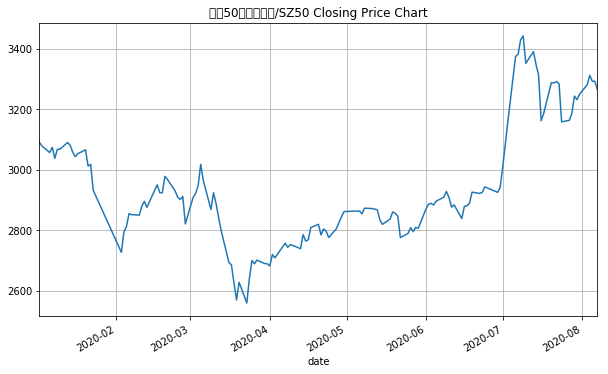

In [8]:
sz50['close'].plot(figsize = (10,6), grid = True, title = '上证50收盘价格表/SZ50 Closing Price Chart')

获取龙虎榜数据：

In [9]:
top_list = ts.top_list('2020-08-10')
top_list.head(8)

,code,name,pchange,amount,buy,sell,reason,bratio,sratio,date
0,000411,英特集团,10.0076,15535.62,9713.30,5822.32,日振幅值达到15%的前五只证券,0.08,0.05,2020-08-10
1,000411,英特集团,10.0076,15535.62,9713.30,5822.32,日涨幅偏离值达到7%的前五只证券,0.08,0.05,2020-08-10
2,000411,英特集团,10.0076,26193.84,14739.65,11454.19,连续三个交易日内，涨幅偏离值累计达到20%的证券,0.06,0.05,2020-08-10
3,000411,英特集团,10.0076,15535.62,9713.30,5822.32,日换手率达到20%的前五只证券,0.08,0.05,2020-08-10
4,000501,鄂武商A,-8.3501,36848.20,15010.22,21837.98,日跌幅偏离值达到7%的前五只证券,0.13,0.19,2020-08-10
5,000516,国际医学,10.0478,19682.64,12952.77,6729.86,日涨幅偏离值达到7%的前五只证券,0.16,0.08,2020-08-10
6,000571,*ST大洲,4.89,7530.10,5258.08,2272.02,异常期间价格涨幅偏离值累计达到15.39%,0.39,0.17,2020-08-10
7,000571,*ST大洲,4.89,7530.10,5258.08,2272.02,连续三个交易日内，涨幅偏离值累计达到12%的ST证券、*ST证券和未完成股改证券,0.39,0.17,2020-08-10


In [10]:
top_list_stockcode = top_list['code'].unique()

In [11]:
len(top_list_stockcode)

83

3. 数据分析：选股条件分析

In [12]:
# 获取股票代码
sz50 = ts.get_sz50s()

In [13]:
sz50.head()

,date,code,name
0,2020-08-10,600000,浦发银行
1,2020-08-10,600009,上海机场
2,2020-08-10,600016,民生银行
3,2020-08-10,600028,中国石化
4,2020-08-10,600030,中信证券


In [14]:
sz50 = sz50['code'].tolist()

In [15]:
sz50[:10]

['600000',
 '600009',
 '600016',
 '600028',
 '600030',
 '600031',
 '600036',
 '600048',
 '600050',
 '600104']

In [16]:
# 获取基本面数据
stockbasics = ts.get_stock_basics()

In [17]:
stockbasics

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
688286,N敏芯,元器件,江苏,493.67,0.12,0.53,3.29,2.60,0.40,1.30,...,19.24,12.03,20200810,1.08,2.03,0.00,0.00,32.98,10.77,14845.0
688339,N亿华通,汽车配件,北京,0.00,0.15,0.71,16.74,0.00,0.00,0.00,...,32.08,5.83,20200810,0.00,0.00,0.00,0.00,39.32,-185.04,13727.0
688516,奥特维,专用机械,江苏,95.46,0.20,0.99,24.26,23.64,0.19,8.47,...,10.15,7.29,20200521,0.41,0.42,0.00,0.00,34.84,8.67,10057.0
688069,德林海,环境保护,江苏,106.64,0.14,0.59,4.13,3.13,0.05,0.80,...,21.15,4.75,20200722,1.82,3.05,0.00,0.00,49.42,29.16,15756.0
600839,四川长虹,家用电器,四川,0.00,46.14,46.16,720.92,506.64,72.79,36.76,...,2.74,1.23,19940311,42.57,0.92,-18.65,-832.82,8.21,-2.15,328929.0
002206,海 利 得,化纤,浙江,29.09,9.60,12.23,58.77,27.02,19.48,8.77,...,2.32,1.87,20080123,7.28,0.60,-14.05,-47.15,21.19,5.61,29000.0
601058,赛轮轮胎,汽车配件,山东,11.07,20.78,26.99,189.67,93.73,65.11,15.23,...,2.74,1.63,20110630,31.65,1.17,-3.90,47.67,24.88,8.40,42349.0
600151,航天机电,汽车配件,上海,0.00,14.34,14.34,105.24,40.71,39.61,48.67,...,3.60,1.91,19980605,-13.69,-0.95,-2.86,15.08,13.23,-6.50,105770.0
002270,华明装备,电气设备,山东,7.56,7.32,7.59,42.06,26.89,4.86,9.42,...,3.41,2.05,20080905,15.01,1.98,-10.26,393.89,51.51,78.90,35910.0


In [18]:
stockbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3969 entries, 688286 to 300872
Data columns (total 22 columns):
name                3969 non-null object
industry            3969 non-null object
area                3969 non-null object
pe                  3969 non-null float64
outstanding         3969 non-null float64
totals              3969 non-null float64
totalAssets         3969 non-null float64
liquidAssets        3969 non-null float64
fixedAssets         3969 non-null float64
reserved            3969 non-null float64
reservedPerShare    3969 non-null float64
esp                 3969 non-null float64
bvps                3969 non-null float64
pb                  3969 non-null float64
timeToMarket        3969 non-null int64
undp                3969 non-null float64
perundp             3969 non-null float64
rev                 3969 non-null float64
profit              3969 non-null float64
gpr                 3969 non-null float64
npr                 3969 non-null float64
holders       

In [19]:
#重置索引
stockbasics.reset_index(inplace = True)

stockbasics.head()


,code,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
0,688286,N敏芯,元器件,江苏,493.67,0.12,0.53,3.29,2.60,0.40,...,19.24,12.03,20200810,1.08,2.03,0.00,0.00,32.98,10.77,14845.0
1,688339,N亿华通,汽车配件,北京,0.00,0.15,0.71,16.74,0.00,0.00,...,32.08,5.83,20200810,0.00,0.00,0.00,0.00,39.32,-185.04,13727.0
2,688516,奥特维,专用机械,江苏,95.46,0.20,0.99,24.26,23.64,0.19,...,10.15,7.29,20200521,0.41,0.42,0.00,0.00,34.84,8.67,10057.0
3,688069,德林海,环境保护,江苏,106.64,0.14,0.59,4.13,3.13,0.05,...,21.15,4.75,20200722,1.82,3.05,0.00,0.00,49.42,29.16,15756.0
4,600839,四川长虹,家用电器,四川,0.00,46.14,46.16,720.92,506.64,72.79,...,2.74,1.23,19940311,42.57,0.92,-18.65,-832.82,8.21,-2.15,328929.0


In [20]:
#从3000多只股票中选出上证50股票

data1 = stockbasics.loc[stockbasics['code'].isin(sz50) , 
                        ['code', 'name', 'industry','pe', 'pb','esp','rev', 'profit']]
data1.head()


,code,name,industry,pe,pb,esp,rev,profit
119,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11
144,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66
210,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77
254,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36
326,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95


In [21]:
data1.columns = ['代码', '股票名称', '所属行业', 'PE', 'PB', 'EPS', '收入同比增长', '利润同比增长']

In [22]:
data1.head()

,代码,股票名称,所属行业,PE,PB,EPS,收入同比增长,利润同比增长
119,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11
144,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66
210,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77
254,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36
326,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95


In [23]:
data1.reset_index(inplace = True)

In [24]:
del data1['index']
data1.head()

,代码,股票名称,所属行业,PE,PB,EPS,收入同比增长,利润同比增长
0,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11
1,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66
2,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77
3,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36
4,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95


In [25]:
# 获取盈利能力数据
stockprofit = ts.get_profit_data(2020,1)


[Getting data:]##################################################################

In [26]:
stockprofit.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,002260,*ST德奥,58.16,68.55,20.6704,33.7153,NaN,49.1790,NaN
1,002069,獐子岛,52.87,0.93,8.7116,3.7139,0.0052,398.4875,0.5603
2,600961,株冶集团,40.07,1.21,4.6506,41.7089,0.0790,3422.5768,6.4888
3,002605,姚记科技,33.05,124.13,67.3586,663.4285,1.6588,534.4203,1.3362
4,002437,誉衡药业,30.17,113.35,67.9203,658.6003,NaN,581.0199,NaN


In [27]:
data2 = stockprofit.loc[stockprofit['code'].isin(sz50),[ 'code','roe', 'net_profit_ratio', 'gross_profit_rate', 'eps']]

In [28]:
data2.head()

,code,roe,net_profit_ratio,gross_profit_rate,eps
46,600519,8.78,53.65,91.6722,10.4233
106,601012,6.31,21.67,31.8651,0.4941
158,601336,5.28,6.80,8.1895,1.4857
204,600031,4.72,12.70,28.1721,0.2600
238,601601,4.51,6.06,7.8438,NaN


In [29]:
data2.columns = ['代码', 'ROE', '净利率', '毛利率', 'EPS']

In [30]:
data2.head()

,代码,ROE,净利率,毛利率,EPS
46,600519,8.78,53.65,91.6722,10.4233
106,601012,6.31,21.67,31.8651,0.4941
158,601336,5.28,6.80,8.1895,1.4857
204,600031,4.72,12.70,28.1721,0.2600
238,601601,4.51,6.06,7.8438,NaN


In [31]:
data2.reset_index(inplace = True)

In [32]:
del data2['index']
data2.head()

,代码,ROE,净利率,毛利率,EPS
0,600519,8.78,53.65,91.6722,10.4233
1,601012,6.31,21.67,31.8651,0.4941
2,601336,5.28,6.80,8.1895,1.4857
3,600031,4.72,12.70,28.1721,0.2600
4,601601,4.51,6.06,7.8438,NaN


In [33]:
# 获取成长能力数据
# nprg:净利润增长率（%）  nav:净资产增长率   epsg,每股收益增长率
stockgrowth = ts.get_growth_data(2020,1)

[Getting data:]##################################################################

In [34]:
stockgrowth.head()

,code,name,mbrg,nprg,nav,targ,epsg,seg
0,002100,天康生物,64.6343,1.350063e+06,49.9003,22.3709,933.3333,53.2175
1,002459,晶澳科技,8355.9489,3.756666e+04,577.0703,1992.3702,10042.8571,551.2873
2,300629,新劲刚,89.9276,2.972065e+04,92.4303,128.3477,NaN,92.4303
3,600517,国网英大,-71.1959,8.225130e+03,375.6353,293.8155,4400.0000,313.5896
4,300799,左江科技,-78.5798,6.909078e+03,NaN,NaN,5253.8462,NaN


In [35]:
data3 = stockgrowth.loc[stockgrowth['code'].isin(sz50) ,
                        [ 'code', 'nprg','nav','epsg']]

In [36]:
data3.head()

,code,nprg,nav,epsg
50,600745,681.8502,103.3323,714.2857
158,601012,193.1058,72.4518,122.7273
217,601236,128.8486,NaN,116.6667
342,603993,64.4872,0.8266,40.0000
393,600547,54.3667,11.8784,5.8824


In [37]:
data3.columns = ['代码','净利润增长率%', '净资产增长率%','每股收益增长率%']

In [38]:
data3.head()

,代码,净利润增长率%,净资产增长率%,每股收益增长率%
50,600745,681.8502,103.3323,714.2857
158,601012,193.1058,72.4518,122.7273
217,601236,128.8486,NaN,116.6667
342,603993,64.4872,0.8266,40.0000
393,600547,54.3667,11.8784,5.8824


In [39]:
data3.reset_index(inplace = True)
del data3['index']
data3.head()

,代码,净利润增长率%,净资产增长率%,每股收益增长率%
0,600745,681.8502,103.3323,714.2857
1,601012,193.1058,72.4518,122.7273
2,601236,128.8486,NaN,116.6667
3,603993,64.4872,0.8266,40.0000
4,600547,54.3667,11.8784,5.8824


In [40]:
#合并数据
data_merged = pd.merge(data1, data2, how= 'left', on= '代码')

In [41]:
data_merged.head()

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,EPS_y
0,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11,3.32,44.52,57.0854,0.2551
1,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66,5.28,6.80,8.1895,1.4857
2,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77,3.49,42.41,54.1248,0.1332
3,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36,4.13,5.05,6.2557,0.6046
4,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95,1.76,23.28,28.2442,0.0960


In [42]:
data_merged= pd.merge(data_merged, data3, how = 'left', on = '代码')

In [43]:
data_merged.head()

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,EPS_y,净利润增长率%,净资产增长率%,每股收益增长率%
0,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11,3.32,44.52,57.0854,0.2551,30.7295,18.8835,31.5789
1,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66,5.28,6.80,8.1895,1.4857,37.6485,19.7391,37.9630
2,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77,3.49,42.41,54.1248,0.1332,128.8486,NaN,116.6667
3,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36,4.13,5.05,6.2557,0.6046,-33.8754,13.5514,-34.7826
4,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95,1.76,23.28,28.2442,0.0960,-36.9547,1.2595,-33.3333


In [44]:
data_merged= data_merged.drop(columns=['EPS_y'])

In [45]:
data_merged.drop_duplicates(inplace = True)

In [46]:
data_merged.head()

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%
0,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11,3.32,44.52,57.0854,30.7295,18.8835,31.5789
1,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66,5.28,6.80,8.1895,37.6485,19.7391,37.9630
2,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77,3.49,42.41,54.1248,128.8486,NaN,116.6667
3,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36,4.13,5.05,6.2557,-33.8754,13.5514,-34.7826
4,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95,1.76,23.28,28.2442,-36.9547,1.2595,-33.3333


In [47]:
#第二种方法

from functools import reduce

# 数据合并
merge = lambda x,y: pd.merge(x, y, how='left', on='代码')     #定义了merge函数；
data_merged2 = reduce(merge, [data1, data2, data3])
data_merged.drop_duplicates(inplace=True)


In [48]:
data_merged2 = data_merged2.drop(columns = 'EPS_y')
data_merged2.head()

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%
0,601066,中信建投,证券,58.08,9.32,0.250,0.00,31.11,3.32,44.52,57.0854,30.7295,18.8835,31.5789
1,601336,新华保险,保险,9.94,2.10,1.486,37.49,37.66,5.28,6.80,8.1895,37.6485,19.7391,37.9630
2,601236,红塔证券,证券,42.76,5.98,0.133,152.45,135.77,3.49,42.41,54.1248,128.8486,NaN,116.6667
3,601628,中国人寿,保险,16.64,2.80,0.605,8.18,-34.36,4.13,5.05,6.2557,-33.8754,13.5514,-34.7826
4,600703,三安光电,半导体,79.81,5.14,0.100,-2.74,-36.95,1.76,23.28,28.2442,-36.9547,1.2595,-33.3333


In [49]:
# 根据已有列计算新数据
data_merged['估值系数'] = data_merged['PE'] * data_merged['PB']
data_merged = round(data_merged,2)
data_merged.head()

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数
0,601066,中信建投,证券,58.08,9.32,0.25,0.00,31.11,3.32,44.52,57.09,30.73,18.88,31.58,541.31
1,601336,新华保险,保险,9.94,2.10,1.49,37.49,37.66,5.28,6.80,8.19,37.65,19.74,37.96,20.87
2,601236,红塔证券,证券,42.76,5.98,0.13,152.45,135.77,3.49,42.41,54.12,128.85,NaN,116.67,255.70
3,601628,中国人寿,保险,16.64,2.80,0.60,8.18,-34.36,4.13,5.05,6.26,-33.88,13.55,-34.78,46.59
4,600703,三安光电,半导体,79.81,5.14,0.10,-2.74,-36.95,1.76,23.28,28.24,-36.95,1.26,-33.33,410.22


In [50]:
data_merged['估值系数'].describe()


count      50.000000
mean      273.058200
std       578.053987
min         0.000000
25%         4.447500
50%        31.375000
75%       314.612500
max      3135.810000
Name: 估值系数, dtype: float64

In [51]:
data_merged['ROE'].describe()

count    49.000000
mean      2.434490
std       2.080281
min      -3.410000
25%       1.470000
50%       2.720000
75%       3.450000
max       8.780000
Name: ROE, dtype: float64

In [52]:
data_merged['净利率'].describe()

count    49.000000
mean     16.560000
std      16.530748
min     -21.840000
25%       4.030000
50%       9.810000
75%      31.710000
max      53.650000
Name: 净利率, dtype: float64

In [53]:
data_merged['净利润增长率%'].describe()

count     50.000000
mean      -9.381200
std      127.789832
min     -352.500000
25%      -44.225000
50%      -14.460000
75%        9.140000
max      681.850000
Name: 净利润增长率%, dtype: float64

In [54]:
data_merged['净资产增长率%'].describe()

count     48.000000
mean      16.562292
std       18.213483
min       -5.490000
25%        6.465000
50%       14.005000
75%       19.880000
max      103.330000
Name: 净资产增长率%, dtype: float64

In [55]:
data_merged['每股收益增长率%'].describe()

count     50.000000
mean     -16.705400
std      136.284628
min     -433.330000
25%      -42.420000
50%      -14.205000
75%        5.880000
max      714.290000
Name: 每股收益增长率%, dtype: float64

In [56]:
data_merged['EPS_x'].describe()

count    50.000000
mean      0.680000
std       2.524179
min      -0.160000
25%       0.137500
50%       0.200000
75%       0.477500
max      17.990000
Name: EPS_x, dtype: float64

In [57]:
#条件选股；
data_merged_filtered1 = data_merged.loc[(data_merged['估值系数'] < 31) & (data_merged['ROE'] > 3.46),
                         ['代码', '股票名称', 'PE', 'PB', 'ROE', '估值系数']]

print('选出了%d只股票'% len(data_merged_filtered1))

选出了6只股票


In [58]:
data_merged_filtered1

,代码,股票名称,PE,PB,ROE,估值系数
1,601336,新华保险,9.94,2.10,5.28,20.87
10,601601,中国太保,8.76,1.49,4.51,13.05
12,601319,中国人保,11.37,1.71,3.75,19.44
18,600036,招商银行,8.39,1.53,4.32,12.84
21,601318,中国平安,13.50,2.04,3.77,27.54
32,601166,兴业银行,3.92,0.65,3.72,2.55


In [59]:
#条件选股；
data_merged_filtered2 = data_merged.loc[(data_merged['净利润增长率%'] > 9) & (data_merged['净资产增长率%'] > 19),
                         ['代码', '股票名称','净利润增长率%','净资产增长率%', '估值系数']]

print('选出了%d只股票'% len(data_merged_filtered2))

选出了6只股票


In [60]:
data_merged_filtered2

,代码,股票名称,净利润增长率%,净资产增长率%,估值系数
1,601336,新华保险,37.65,19.74,20.87
23,601012,隆基股份,193.11,72.45,222.68
25,601818,光大银行,11.51,19.62,2.84
28,600745,闻泰科技,681.85,103.33,483.94
39,600519,贵州茅台,16.34,20.42,679.33
44,600276,恒瑞医药,9.39,28.16,1642.57


In [61]:
pd.concat((data_merged_filtered1,data_merged_filtered2),axis = 1)

,代码,股票名称,PE,PB,ROE,估值系数,代码,股票名称,净利润增长率%,净资产增长率%,估值系数
1,601336,新华保险,9.94,2.10,5.28,20.87,601336,新华保险,37.65,19.74,20.87
10,601601,中国太保,8.76,1.49,4.51,13.05,NaN,NaN,NaN,NaN,NaN
12,601319,中国人保,11.37,1.71,3.75,19.44,NaN,NaN,NaN,NaN,NaN
18,600036,招商银行,8.39,1.53,4.32,12.84,NaN,NaN,NaN,NaN,NaN
21,601318,中国平安,13.50,2.04,3.77,27.54,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,601012,隆基股份,193.11,72.45,222.68
25,NaN,NaN,NaN,NaN,NaN,NaN,601818,光大银行,11.51,19.62,2.84
28,NaN,NaN,NaN,NaN,NaN,NaN,600745,闻泰科技,681.85,103.33,483.94
32,601166,兴业银行,3.92,0.65,3.72,2.55,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,600519,贵州茅台,16.34,20.42,679.33


In [62]:
data_merged_filtered1.join(data_merged_filtered2,lsuffix = '_l')

,代码_l,股票名称_l,PE,PB,ROE,估值系数_l,代码,股票名称,净利润增长率%,净资产增长率%,估值系数
1,601336,新华保险,9.94,2.10,5.28,20.87,601336,新华保险,37.65,19.74,20.87
10,601601,中国太保,8.76,1.49,4.51,13.05,NaN,NaN,NaN,NaN,NaN
12,601319,中国人保,11.37,1.71,3.75,19.44,NaN,NaN,NaN,NaN,NaN
18,600036,招商银行,8.39,1.53,4.32,12.84,NaN,NaN,NaN,NaN,NaN
21,601318,中国平安,13.50,2.04,3.77,27.54,NaN,NaN,NaN,NaN,NaN
32,601166,兴业银行,3.92,0.65,3.72,2.55,NaN,NaN,NaN,NaN,NaN


In [63]:
pd.merge(data_merged_filtered1,data_merged_filtered2, how = 'outer')

,代码,股票名称,PE,PB,ROE,估值系数,净利润增长率%,净资产增长率%
0,601336,新华保险,9.94,2.10,5.28,20.87,37.65,19.74
1,601601,中国太保,8.76,1.49,4.51,13.05,NaN,NaN
2,601319,中国人保,11.37,1.71,3.75,19.44,NaN,NaN
3,600036,招商银行,8.39,1.53,4.32,12.84,NaN,NaN
4,601318,中国平安,13.50,2.04,3.77,27.54,NaN,NaN
5,601166,兴业银行,3.92,0.65,3.72,2.55,NaN,NaN
6,601012,隆基股份,NaN,NaN,NaN,222.68,193.11,72.45
7,601818,光大银行,NaN,NaN,NaN,2.84,11.51,19.62
8,600745,闻泰科技,NaN,NaN,NaN,483.94,681.85,103.33
9,600519,贵州茅台,NaN,NaN,NaN,679.33,16.34,20.42


In [64]:
data_merged_filtered1_2 = pd.merge(data_merged_filtered1,data_merged_filtered2, how = 'outer')

In [65]:
#条件选股；
data_merged_filtered3 = data_merged.loc[(data_merged['每股收益增长率%'] > 5.88) & (data_merged['EPS_x'] > 0.47),
                         ['代码', '股票名称','每股收益增长率%','EPS_x', '估值系数']]

print('选出了%d只股票'% len(data_merged_filtered3))

选出了8只股票


In [66]:
data_merged_filtered3

,代码,股票名称,每股收益增长率%,EPS_x,估值系数
1,601336,新华保险,37.96,1.49,20.87
10,601601,中国太保,55.00,0.93,13.05
18,600036,招商银行,10.00,1.10,12.84
23,601012,隆基股份,122.73,0.49,222.68
28,600745,闻泰科技,714.29,0.57,483.94
32,601166,兴业银行,6.32,1.01,2.55
39,600519,贵州茅台,16.69,17.99,679.33
44,600276,恒瑞医药,7.41,0.50,1642.57


In [67]:
pd.merge(data_merged_filtered1_2,data_merged_filtered3, how = 'inner')

,代码,股票名称,PE,PB,ROE,估值系数,净利润增长率%,净资产增长率%,每股收益增长率%,EPS_x
0,601336,新华保险,9.94,2.10,5.28,20.87,37.65,19.74,37.96,1.49
1,601601,中国太保,8.76,1.49,4.51,13.05,NaN,NaN,55.00,0.93
2,600036,招商银行,8.39,1.53,4.32,12.84,NaN,NaN,10.00,1.10
3,601166,兴业银行,3.92,0.65,3.72,2.55,NaN,NaN,6.32,1.01
4,601012,隆基股份,NaN,NaN,NaN,222.68,193.11,72.45,122.73,0.49
5,600745,闻泰科技,NaN,NaN,NaN,483.94,681.85,103.33,714.29,0.57
6,600519,贵州茅台,NaN,NaN,NaN,679.33,16.34,20.42,16.69,17.99
7,600276,恒瑞医药,NaN,NaN,NaN,1642.57,9.39,28.16,7.41,0.50


In [68]:
data_merged_filtered1_2_3 = pd.merge(data_merged_filtered1_2,data_merged_filtered3, how = 'inner')

In [69]:
# 数据排列
data_merged_filtered1_2_3.sort_values(['估值系数'], ascending=True, inplace=True) 

In [70]:
data_merged_filtered1_2_3

,代码,股票名称,PE,PB,ROE,估值系数,净利润增长率%,净资产增长率%,每股收益增长率%,EPS_x
3,601166,兴业银行,3.92,0.65,3.72,2.55,NaN,NaN,6.32,1.01
2,600036,招商银行,8.39,1.53,4.32,12.84,NaN,NaN,10.00,1.10
1,601601,中国太保,8.76,1.49,4.51,13.05,NaN,NaN,55.00,0.93
0,601336,新华保险,9.94,2.10,5.28,20.87,37.65,19.74,37.96,1.49
4,601012,隆基股份,NaN,NaN,NaN,222.68,193.11,72.45,122.73,0.49
5,600745,闻泰科技,NaN,NaN,NaN,483.94,681.85,103.33,714.29,0.57
6,600519,贵州茅台,NaN,NaN,NaN,679.33,16.34,20.42,16.69,17.99
7,600276,恒瑞医药,NaN,NaN,NaN,1642.57,9.39,28.16,7.41,0.50


In [71]:
# 数据分类

def map_func(x):
    """
    作为 apply 函数的参数传入
    :param x: df 中一行或一列数据，取决于 apply 函数的参数 axis
    :return: 将每个计算结果组合，返回一个 series
    """    
    if x['ROE'] > 3.49:
        return '高成长'
    elif x['ROE'] >= 0:
        return '低成长'
    elif x['ROE'] < 0:
        return '亏损'
    
# 根据 ROE 数据计算“成长性”    
data_merged['成长性'] = data_merged.apply(map_func, axis= 1)
data_merged.tail(10)

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数,成长性
42,600887,伊利股份,乳制品,48.46,8.23,0.19,-10.98,-49.78,4.25,5.56,37.46,-49.47,2.14,-48.65,398.83,高成长
43,601989,中国重工,船舶,285.28,1.35,0.00,-25.67,-80.77,0.11,2.23,12.61,-80.70,0.67,-82.61,385.13,低成长
44,600276,恒瑞医药,化学制药,90.50,18.15,0.50,12.79,10.34,NaN,NaN,NaN,9.39,28.16,7.41,1642.57,None
45,600031,三一重工,工程机械,20.31,3.82,0.26,-18.92,-31.90,4.72,12.70,28.17,-33.41,19.81,-36.93,77.58,高成长
46,600309,万华化学,化工原料,38.13,4.81,0.44,-3.82,-50.74,3.15,8.97,20.09,-49.06,6.63,-50.56,183.41,低成长
47,600690,海尔智家,家用电器,34.32,3.05,0.16,-11.09,-50.16,2.20,2.48,27.44,-49.61,15.95,-51.34,104.68,低成长
48,600547,山东黄金,黄金,59.37,5.63,0.18,28.70,57.94,2.37,4.03,12.49,54.37,11.88,5.88,334.25,低成长
49,601888,中国中免,旅游服务,0.00,21.02,-0.06,-44.23,-105.21,-0.60,-1.57,42.55,-118.36,4.59,-105.21,0.00,亏损
50,603993,洛阳钼业,小金属,55.07,2.42,0.02,399.82,39.24,1.09,2.00,-5.16,64.49,0.83,40.00,133.27,低成长
51,600196,复星医药,化学制药,71.49,5.04,0.22,-12.62,-18.97,1.76,9.81,55.13,-23.78,15.00,-17.86,360.31,低成长


In [72]:
# 对高成长分类按照‘烟蒂系数’做升序排列
# 选择具体的某一列，按照一定的顺序进行呈现；
data_growth = data_merged[data_merged['成长性'] == '高成长'].sort_values(['估值系数'], ascending=True)
data_growth.head(50)

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数,成长性
32,601166,兴业银行,银行,3.92,0.65,1.01,5.54,6.75,3.72,41.75,48.06,6.90,17.15,6.32,2.55,高成长
18,600036,招商银行,银行,8.39,1.53,1.10,11.44,10.12,4.32,36.28,45.86,9.64,13.16,10.00,12.84,高成长
10,601601,中国太保,保险,8.76,1.49,0.93,3.80,53.09,4.51,6.06,7.84,53.42,14.49,55.00,13.05,高成长
12,601319,中国人保,保险,11.37,1.71,0.16,3.21,19.94,3.75,4.18,7.18,21.18,12.35,23.08,19.44,高成长
1,601336,新华保险,保险,9.94,2.10,1.49,37.49,37.66,5.28,6.80,8.19,37.65,19.74,37.96,20.87,高成长
21,601318,中国平安,保险,13.50,2.04,1.47,-13.22,-42.74,3.77,7.94,11.42,-38.50,23.28,-42.35,27.54,高成长
3,601628,中国人寿,保险,16.64,2.80,0.60,8.18,-34.36,4.13,5.05,6.26,-33.88,13.55,-34.78,46.59,高成长
45,600031,三一重工,工程机械,20.31,3.82,0.26,-18.92,-31.90,4.72,12.70,28.17,-33.41,19.81,-36.93,77.58,高成长
23,601012,隆基股份,电气设备,29.69,7.50,0.49,50.60,204.92,6.31,21.67,31.87,193.11,72.45,122.73,222.68,高成长
42,600887,伊利股份,乳制品,48.46,8.23,0.19,-10.98,-49.78,4.25,5.56,37.46,-49.47,2.14,-48.65,398.83,高成长


In [73]:
data_profit = data_merged[data_merged['成长性'] == '高成长'].sort_values(['ROE'], ascending=False)
data_profit.head(50)

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数,成长性
39,600519,贵州茅台,白酒,45.41,14.96,17.99,11.31,13.29,8.78,53.65,91.67,16.34,20.42,16.69,679.33,高成长
23,601012,隆基股份,电气设备,29.69,7.50,0.49,50.60,204.92,6.31,21.67,31.87,193.11,72.45,122.73,222.68,高成长
1,601336,新华保险,保险,9.94,2.10,1.49,37.49,37.66,5.28,6.80,8.19,37.65,19.74,37.96,20.87,高成长
45,600031,三一重工,工程机械,20.31,3.82,0.26,-18.92,-31.90,4.72,12.70,28.17,-33.41,19.81,-36.93,77.58,高成长
10,601601,中国太保,保险,8.76,1.49,0.93,3.80,53.09,4.51,6.06,7.84,53.42,14.49,55.00,13.05,高成长
18,600036,招商银行,银行,8.39,1.53,1.10,11.44,10.12,4.32,36.28,45.86,9.64,13.16,10.00,12.84,高成长
42,600887,伊利股份,乳制品,48.46,8.23,0.19,-10.98,-49.78,4.25,5.56,37.46,-49.47,2.14,-48.65,398.83,高成长
3,601628,中国人寿,保险,16.64,2.80,0.60,8.18,-34.36,4.13,5.05,6.26,-33.88,13.55,-34.78,46.59,高成长
21,601318,中国平安,保险,13.50,2.04,1.47,-13.22,-42.74,3.77,7.94,11.42,-38.50,23.28,-42.35,27.54,高成长
12,601319,中国人保,保险,11.37,1.71,0.16,3.21,19.94,3.75,4.18,7.18,21.18,12.35,23.08,19.44,高成长


In [74]:
def group_func(df):
    """
    作为 groupby.apply 函数的参数传入
    :param df: 实际是经过聚合后的单一类的 dataframe
    :return: 返回 df 按照’烟蒂系数‘排序后的前三位
    """
    return df.sort_values(['估值系数'], ascending=True)[:3]


In [75]:
# 按‘成长性’分组，筛选每个分组中‘烟蒂系数’最低的两个个股
data_grouped = data_merged.groupby('成长性')

In [76]:
data_grouped

In [77]:
data_grouped.size()

成长性
亏损      4
低成长    34
高成长    11
dtype: int64

In [78]:
data_grouped = data_merged.groupby('成长性').apply(group_func)
data_grouped

代码  股票名称  所属行业    PE     PB  EPS_x  收入同比增长  利润同比增长   ROE    净利率  \
成长性                                                                           
亏损  14  600588  用友网络  软件服务  0.00  21.46  -0.07  -13.06 -389.30 -3.41 -21.84   
    33  601857  中国石油  石油开采  0.00   0.67  -0.09  -14.41 -258.46 -1.33  -3.18   
    37  600028  中国石化  石油加工  0.00   0.68  -0.16  -22.59 -234.00 -2.77  -3.56   
低成长 29  600016  民生银行    银行  3.68   0.52   0.38   12.48    5.43  3.09  33.75   
    34  601328  交通银行    银行  4.14   0.50   0.25    4.67    1.80  2.64  33.00   
    22  600000  浦发银行    银行  4.45   0.60   0.56   10.66    5.48  3.01  31.32   
高成长 32  601166  兴业银行    银行  3.92   0.65   1.01    5.54    6.75  3.72  41.75   
    18  600036  招商银行    银行  8.39   1.53   1.10   11.44   10.12  4.32  36.28   
    10  601601  中国太保    保险  8.76   1.49   0.93    3.80   53.09  4.51   6.06   

          毛利率  净利润增长率%  净资产增长率%  每股收益增长率%   估值系数  成长性  
成长性                                                    
亏损  14  46.39  -352.50     8.94   -433.33   0.00   亏损  
    33  16.41  -183.22     0.14   -258.93   0.00   亏损  
    37  10.12  -213.86    -3.90   -233.61   0.00   亏损  
低成长 29  40.77     5.28    22.45      5.56   1.91  低成长  
    34  37.49     0.91    13.20    -10.71   2.07  低成长  
    22  37.39     5.44    17.60      5.66   2.67  低成长  
高成长 32  48.06     6.90    17.15      6.32   2.55  高成长  
    18  45.86     9.64    13.16     10.00  12.84  高成长  
    10   7.84    53.42    14.49     55.00  13.05  高成长

In [79]:
data_grouped_industry = data_merged.groupby('所属行业').apply(group_func)

In [80]:
data_grouped_industry

代码  股票名称  所属行业      PE     PB  EPS_x  收入同比增长   利润同比增长   ROE  \
所属行业                                                                       
乳制品  42  600887  伊利股份   乳制品   48.46   8.23   0.19  -10.98   -49.78  4.25   
保险   10  601601  中国太保    保险    8.76   1.49   0.93    3.80    53.09  4.51   
     12  601319  中国人保    保险   11.37   1.71   0.16    3.21    19.94  3.75   
     1   601336  新华保险    保险    9.94   2.10   1.49   37.49    37.66  5.28   
元器件  35  603160  汇顶科技   元器件  115.67  14.11   0.44   10.27   -50.58  3.05   
全国地产 8   600048  保利地产  全国地产   20.40   1.34   0.20    5.51     2.55  1.47   
化学制药 51  600196  复星医药  化学制药   71.49   5.04   0.22  -12.62   -18.97  1.76   
     44  600276  恒瑞医药  化学制药   90.50  18.15   0.50   12.79    10.34   NaN   
     15  603259  药明康德  化学制药  222.24  14.11   0.19   15.09   -21.59  1.70   
化工原料 46  600309  万华化学  化工原料   38.13   4.81   0.44   -3.82   -50.74  3.15   
半导体  4   600703  三安光电   半导体   79.81   5.14   0.10   -2.74   -36.95  1.76   
家用电器 47  600690  海尔智家  家用电器   34.32   3.05   0.16  -11.09   -50.16  2.20   
小金属  50  603993  洛阳钼业   小金属   55.07   2.42   0.02  399.82    39.24  1.09   
工程机械 45  600031  三一重工  工程机械   20.31   3.82   0.26  -18.92   -31.90  4.72   
建筑工程 9   601668  中国建筑  建筑工程    7.23   0.83   0.18  -11.34   -14.51  2.87   
     7   601186  中国铁建  建筑工程   10.50   0.73   0.18   -7.63   -23.55  1.40   
旅游服务 49  601888  中国中免  旅游服务    0.00  21.02  -0.06  -44.23  -105.21 -0.60   
机场   19  600009  上海机场    机场  409.30   4.11   0.04  -41.02   -94.21  0.25   
水泥   40  600585  海螺水泥    水泥   16.61   2.29   0.93  -23.91   -19.21  3.45   
汽车整车 16  600104  上汽集团  汽车整车   47.69   0.86   0.10  -48.35   -86.42  0.44   
煤炭开采 30  601088  中国神华  煤炭开采    7.84   0.85   0.49  -10.41   -22.09  2.70   
电信运营 13  600050  中国联通  电信运营   28.34   1.10   0.04    0.93   -14.11  0.96   
电气设备 23  601012  隆基股份  电气设备   29.69   7.50   0.49   50.60   204.92  6.31   
白酒   39  600519  贵州茅台    白酒   45.41  14.96  17.99   11.31    13.29  8.78   
石油加工 37  600028  中国石化  石油加工    0.00   0.68  -0.16  -22.59  -234.00 -2.77   
石油开采 33  601857  中国石油  石油开采    0.00   0.67  -0.09  -14.41  -258.46 -1.33   
船舶   43  601989  中国重工    船舶  285.28   1.35   0.00  -25.67   -80.77  0.11   
证券   27  601688  华泰证券    证券   16.57   1.53   0.32    9.87     3.90  2.30   
     5   600837  海通证券    证券   21.55   1.36   0.20  -29.81   -39.45  1.78   
     11  601211  国泰君安    证券   23.05   1.37   0.19   -8.22   -39.25  1.31   
软件服务 14  600588  用友网络  软件服务    0.00  21.46  -0.07  -13.06  -389.30 -3.41   
通信设备 26  601138  工业富联  通信设备   38.33   3.14   0.09   -0.08   -35.01  2.05   
     28  600745  闻泰科技  通信设备   67.59   7.16   0.57  132.06  1379.54  2.93   
铁路   24  601816  京沪高铁    铁路  237.12   1.67   0.01    0.00     0.00  0.17   
银行   29  600016  民生银行    银行    3.68   0.52   0.38   12.48     5.43  3.09   
     34  601328  交通银行    银行    4.14   0.50   0.25    4.67     1.80  2.64   
     32  601166  兴业银行    银行    3.92   0.65   1.01    5.54     6.75  3.72   
黄金   48  600547  山东黄金    黄金   59.37   5.63   0.18   28.70    57.94  2.37   

           净利率    毛利率  净利润增长率%  净资产增长率%  每股收益增长率%     估值系数   成长性  
所属行业                                                              
乳制品  42   5.56  37.46   -49.47     2.14    -48.65   398.83   高成长  
保险   10   6.06   7.84    53.42    14.49     55.00    13.05   高成长  
     12   4.18   7.18    21.18    12.35     23.08    19.44   高成长  
     1    6.80   8.19    37.65    19.74     37.96    20.87   高成长  
元器件  35  15.15  50.17   -50.58    45.97    -51.65  1632.10   低成长  
全国地产 8    9.98  39.78     7.90    24.26      0.00    27.34   低成长  
化学制药 51   9.81  55.13   -23.78    15.00    -17.86   360.31   低成长  
     44    NaN    NaN     9.39    28.16      7.41  1642.57  None  
     15   9.50  34.46   -26.22    -5.49    -42.42  3135.81   低成长  
化工原料 46   8.97  20.09   -49.06     6.63    -50.56   183.41   低成长  
半导体  4   23.28  28.24   -36.95     1.26    -33.33   410.22   低成长  
家用电器 47   2.48  27.44   -49.61    15.95    -51.34   104.68   低成长  
小金属  50   2.00  -5.16    64.49    

4.数据的存储: HDF5, Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式

In [87]:
data_merged.head()

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数,成长性
0,601066,中信建投,证券,58.08,9.32,0.25,0.00,31.11,3.32,44.52,57.09,30.73,18.88,31.58,541.31,低成长
1,601336,新华保险,保险,9.94,2.10,1.49,37.49,37.66,5.28,6.80,8.19,37.65,19.74,37.96,20.87,高成长
2,601236,红塔证券,证券,42.76,5.98,0.13,152.45,135.77,3.49,42.41,54.12,128.85,NaN,116.67,255.70,低成长
3,601628,中国人寿,保险,16.64,2.80,0.60,8.18,-34.36,4.13,5.05,6.26,-33.88,13.55,-34.78,46.59,高成长
4,600703,三安光电,半导体,79.81,5.14,0.10,-2.74,-36.95,1.76,23.28,28.24,-36.95,1.26,-33.33,410.22,低成长


In [81]:
hdf5 = pd.HDFStore('data_merged.h5', 'w')

In [82]:
hdf5['data'] = data_merged   #把刚刚从tushare上调取的并处理后的并数据存进HDF5文件里；

In [83]:
hdf5.close()

In [84]:
hdf5 = pd.HDFStore('data_merged.h5', 'r')

In [91]:
data_m = hdf5['data']

In [92]:
data_m

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数,成长性
0,601066,中信建投,证券,58.08,9.32,0.25,0.00,31.11,3.32,44.52,57.09,30.73,18.88,31.58,541.31,低成长
1,601336,新华保险,保险,9.94,2.10,1.49,37.49,37.66,5.28,6.80,8.19,37.65,19.74,37.96,20.87,高成长
2,601236,红塔证券,证券,42.76,5.98,0.13,152.45,135.77,3.49,42.41,54.12,128.85,NaN,116.67,255.70,低成长
3,601628,中国人寿,保险,16.64,2.80,0.60,8.18,-34.36,4.13,5.05,6.26,-33.88,13.55,-34.78,46.59,高成长
4,600703,三安光电,半导体,79.81,5.14,0.10,-2.74,-36.95,1.76,23.28,28.24,-36.95,1.26,-33.33,410.22,低成长
5,600837,海通证券,证券,21.55,1.36,0.20,-29.81,-39.45,1.78,32.67,45.36,-44.29,5.97,-39.39,29.31,低成长
6,600030,中信证券,证券,26.33,2.42,0.32,22.14,-4.28,2.29,31.71,43.05,-3.07,12.07,-8.57,63.72,低成长
7,601186,中国铁建,建筑工程,10.50,0.73,0.18,-7.63,-23.55,1.40,2.04,8.79,-19.06,25.58,-34.88,7.66,低成长
8,600048,保利地产,全国地产,20.40,1.34,0.20,5.51,2.55,1.47,9.98,39.78,7.90,24.26,0.00,27.34,低成长
9,601668,中国建筑,建筑工程,7.23,0.83,0.18,-11.34,-14.51,2.87,2.87,9.25,-15.07,11.43,-14.29,6.00,低成长


In [88]:
data_m[(data_m['ROE']>5) & (data_m['净利润增长率%']>20)]   #数据库调取数据并进行多条件选股； and so on...

,代码,股票名称,所属行业,PE,PB,EPS_x,收入同比增长,利润同比增长,ROE,净利率,毛利率,净利润增长率%,净资产增长率%,每股收益增长率%,估值系数,成长性
1,601336,新华保险,保险,9.94,2.1,1.49,37.49,37.66,5.28,6.80,8.19,37.65,19.74,37.96,20.87,高成长
23,601012,隆基股份,电气设备,29.69,7.5,0.49,50.60,204.92,6.31,21.67,31.87,193.11,72.45,122.73,222.68,高成长
